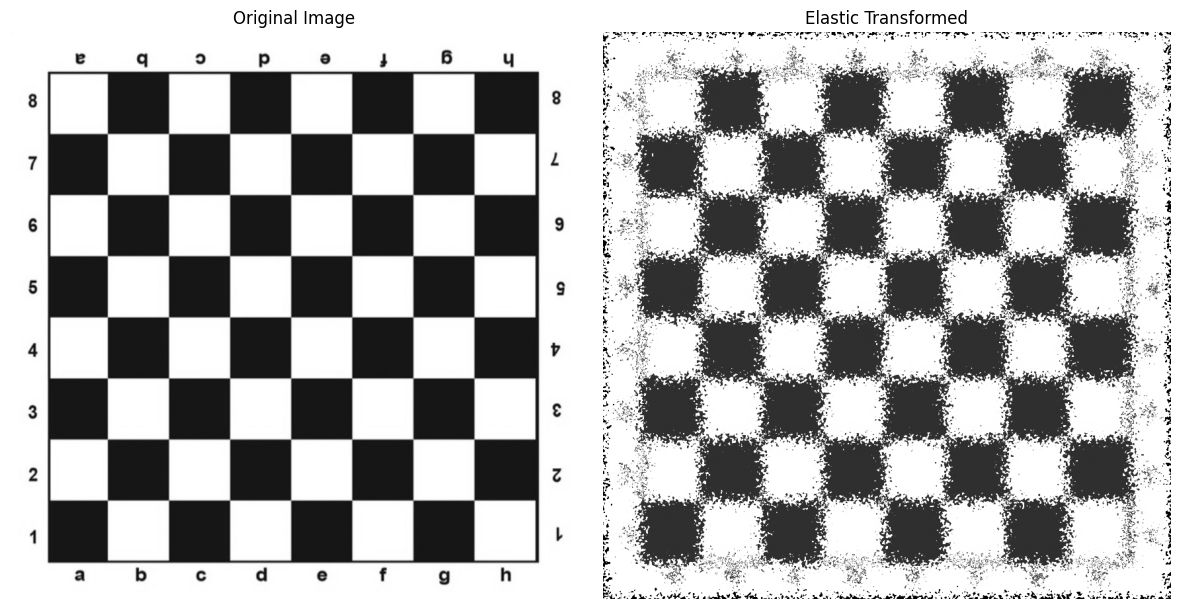

In [37]:
import numpy as np
from scipy.ndimage import map_coordinates, gaussian_filter
from PIL import Image
import matplotlib.pyplot as plt

def elastic_transform(image, alpha, sigma, random_state=None):
    """
    Elastic deformation of images as described in [Simard2003]_.
    
    Parameters:
        image: np.array
            Input image (2D array).
        alpha: float
            Scaling factor for the displacement field.
        sigma: float
            Standard deviation of the Gaussian filter.
        random_state: np.random.RandomState
            Random state for reproducibility.
    
    Returns:
        Transformed image as a 2D array.
    """
    if random_state is None:
        random_state = np.random.RandomState(None)
    
    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y + dy, (-1, 1)), np.reshape(x + dx, (-1, 1))
    
    return map_coordinates(image, indices, order=1).reshape(shape)

# Load and process image
image_path = "../images/image_1.jpg"
try:
    # Load image and convert to grayscale numpy array
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    
    # Apply transformation
    transformed_array = elastic_transform(image_array, alpha=40, sigma=1)
    
    # Display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(image_array, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(transformed_array, cmap='gray')
    ax2.set_title('Elastic Transformed')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: Image not found at {image_path}")
    print("Please verify:")
    print(f"1. File exists at path: {image_path}")
    print("2. Correct file extension (.png vs .jpg)")
    print("3. Working directory is project root")
